# Stima $R_t$

La stima di $R_t$ è effettuata mediante il modello semplificato **RKI**

https://covid19.infn.it/sommario/rt-info.html

In [40]:
import matplotlib.pyplot as plt

from aidam.math_utils import moving_function_rev1
#from aidam.miscellanea_utils import find_matlabstyle
#from aidam.aicharts import get_subplot_cells_sequence, confplot_ax, auto_grid_shape
#import pickle as pkl
import numpy as np
from covid_lib import read_covid_data, find_day_index

## Lettura dati

In [41]:
trend,regioni,giorni,giorno_settimana,popolazione,day_counter=read_covid_data('stored_data.pkl')

Giorni osservati: 325
Primo giorno: 2020-02-24T18:00:00
Ultimo giorno: 2021-01-13T17:00:00


## Costanti e parametri

In [42]:
end_day=len(giorni)-1
start_day=end_day-120


regione='Toscana'

print('Rt sarà stimato per %s dal %s al %s'%(regione,giorni[start_day][0:10],giorni[end_day][0:10]))

Rt sarà stimato per Toscana dal 2020-09-15 al 2021-01-13


## Calcolo modello KRI

In [43]:
numero_giorni=end_day-start_day

kdays=4

# estendo le regioni con l'Italia
regioni_plus=list(regioni)
regioni_plus.append('Italia')
regioni_plus=np.asarray(regioni_plus)

In [44]:
rt={}
for regione in regioni_plus:
    rt[regione]=np.zeros(numero_giorni)
    print(regione)
    for i,day in enumerate(range(start_day,end_day)):
        temp1=trend['totale_positivi'][regione][day-kdays:day]
        temp2=trend['totale_positivi'][regione][day-2*kdays:day-kdays]
        rt[regione][i]=np.sum(temp1)/np.sum(temp2)    

Abruzzo
Basilicata
Calabria
Campania
Emilia-Romagna
Friuli Venezia Giulia
Lazio
Liguria
Lombardia
Marche
Molise
P.A. Bolzano
P.A. Trento
Piemonte
Puglia
Sardegna
Sicilia
Toscana
Umbria
Valle d'Aosta
Veneto
Italia


C:\Users\klaat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


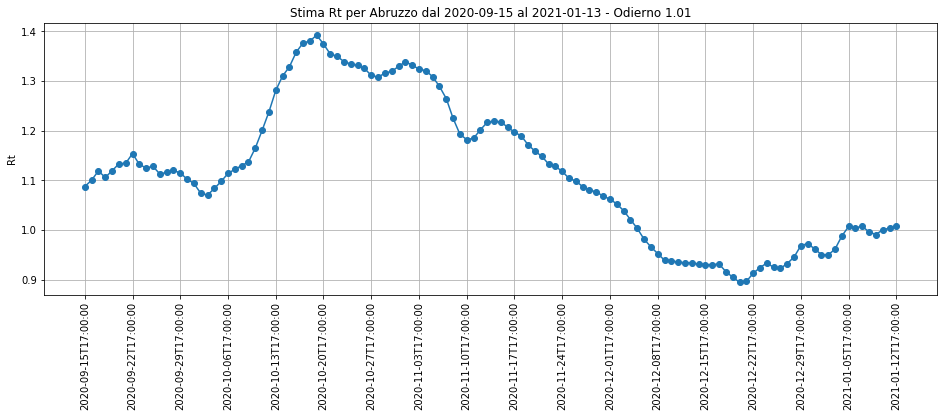

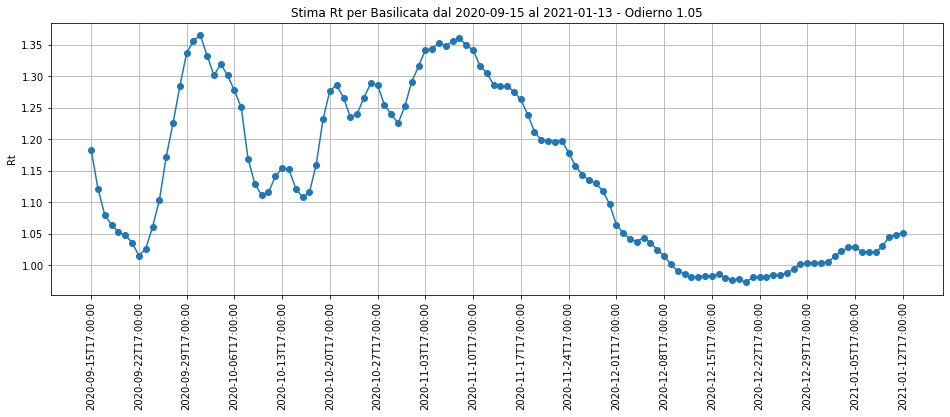

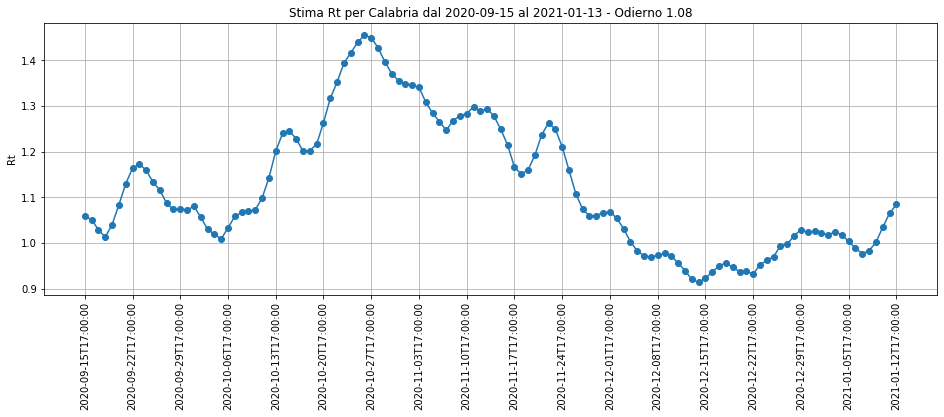

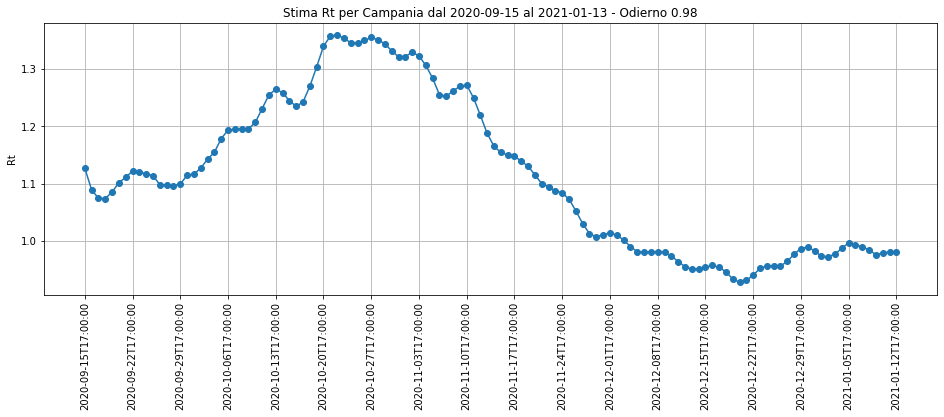

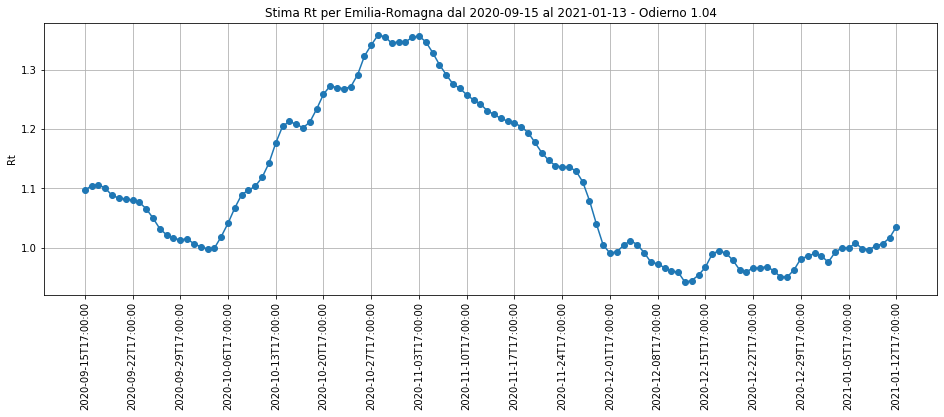

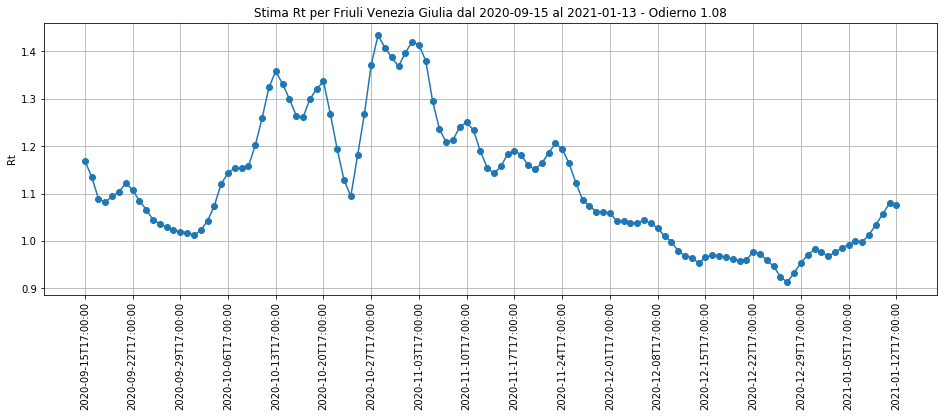

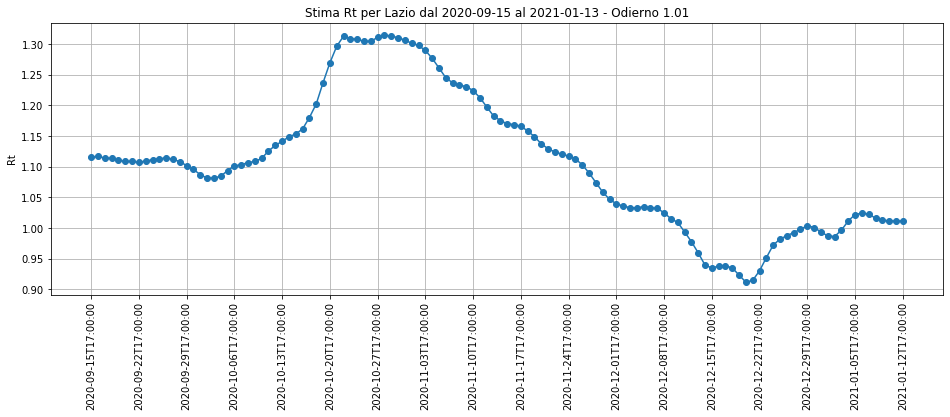

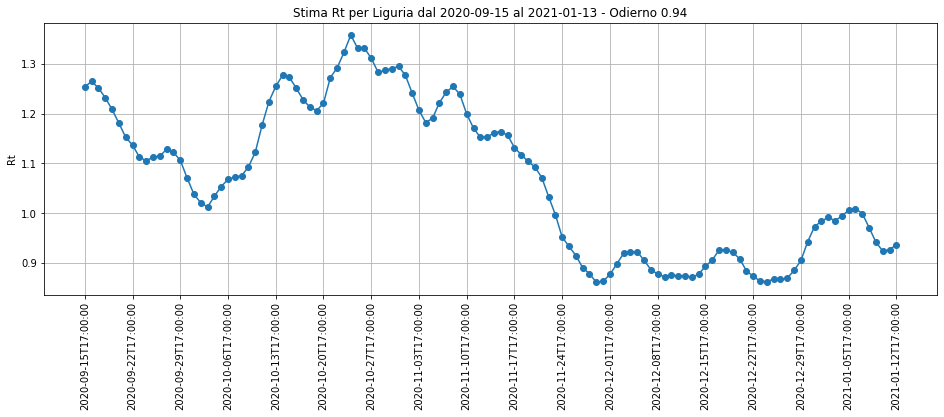

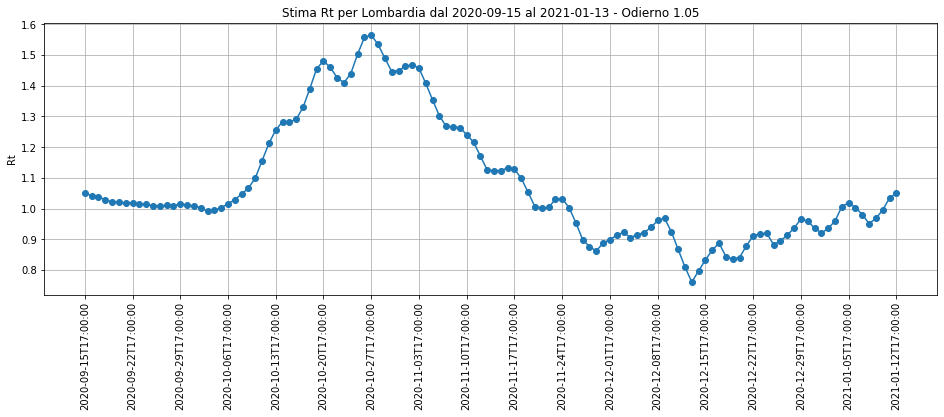

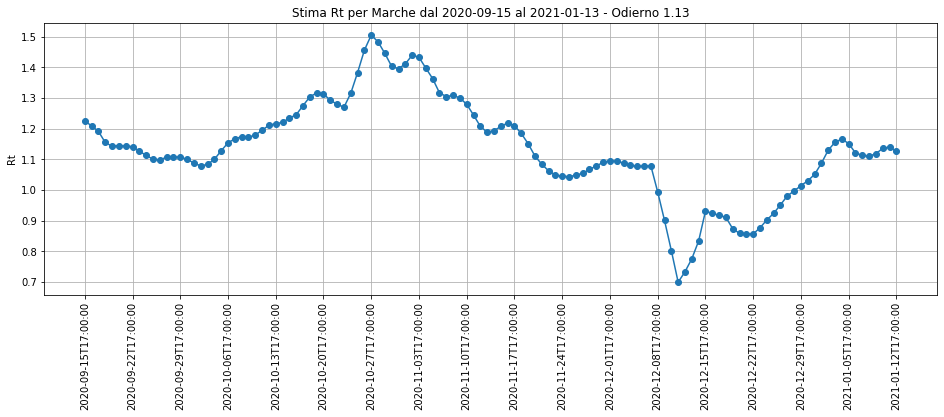

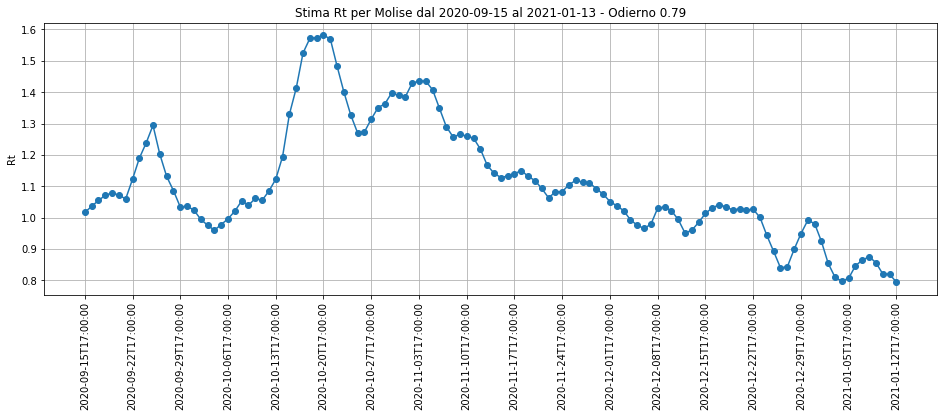

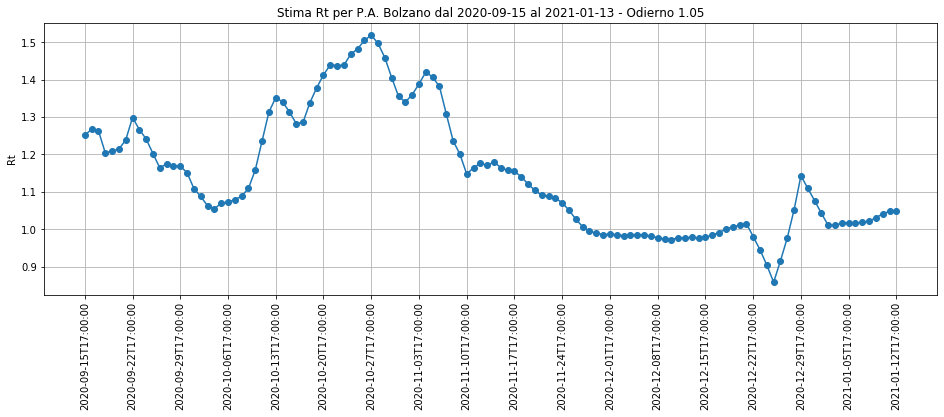

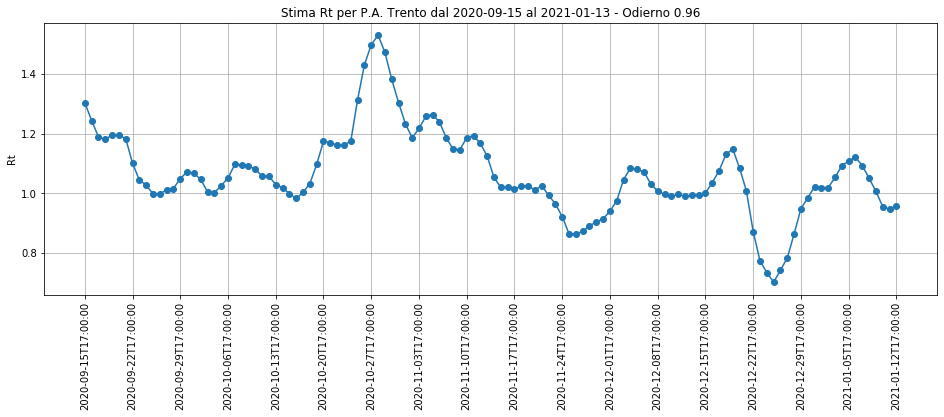

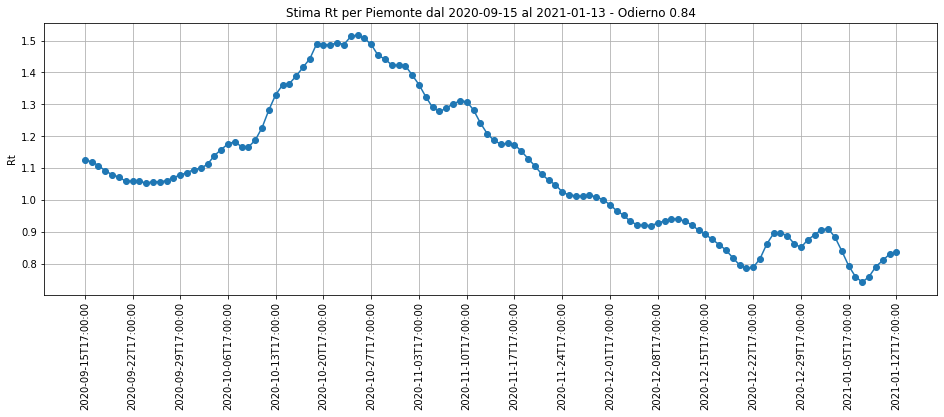

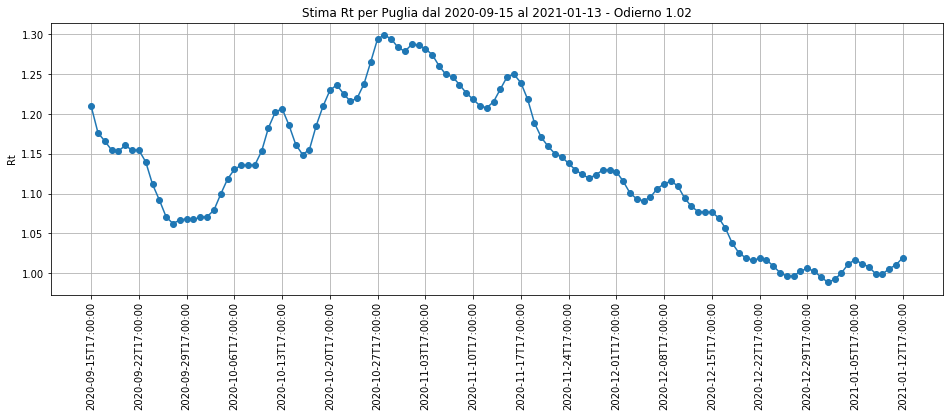

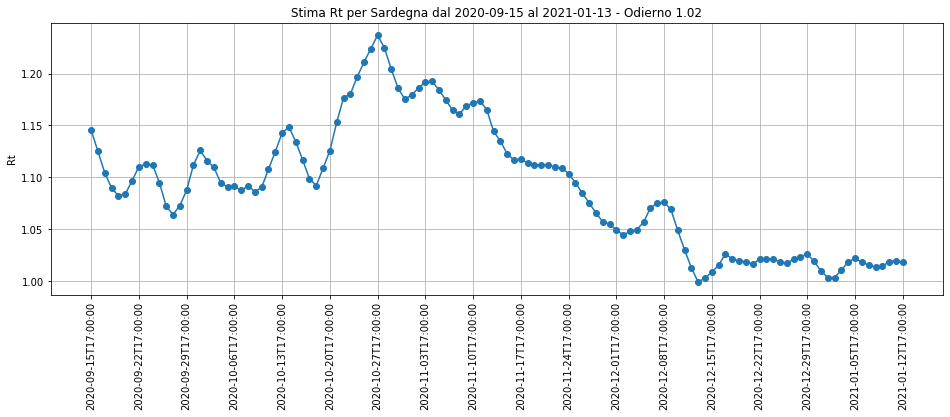

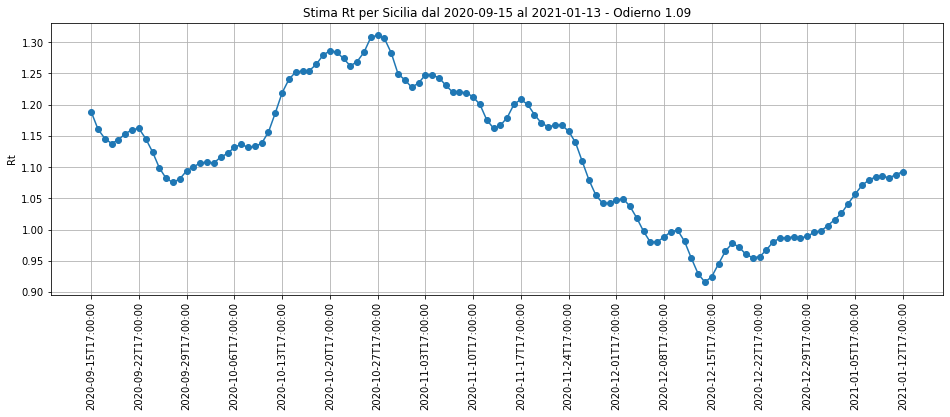

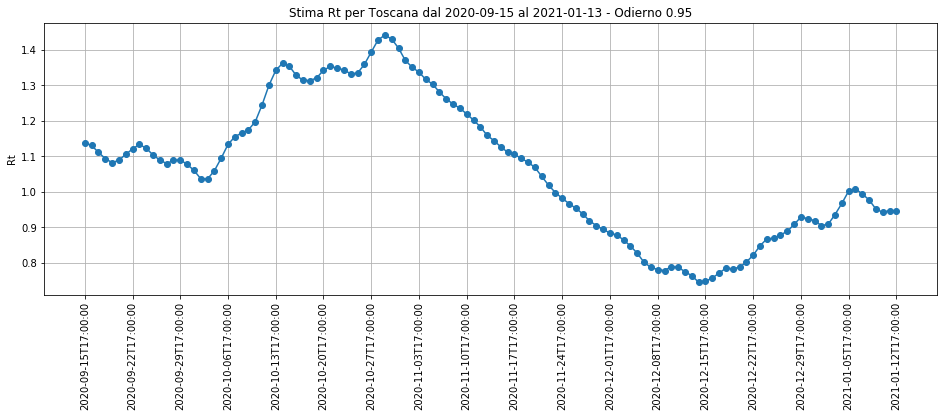

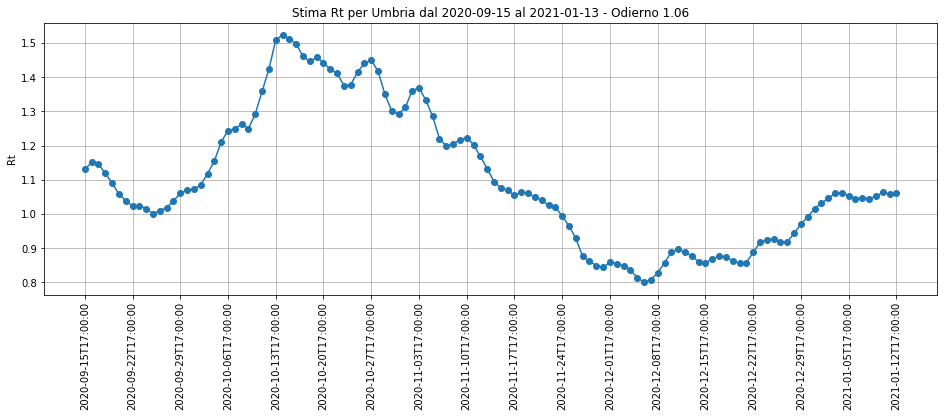

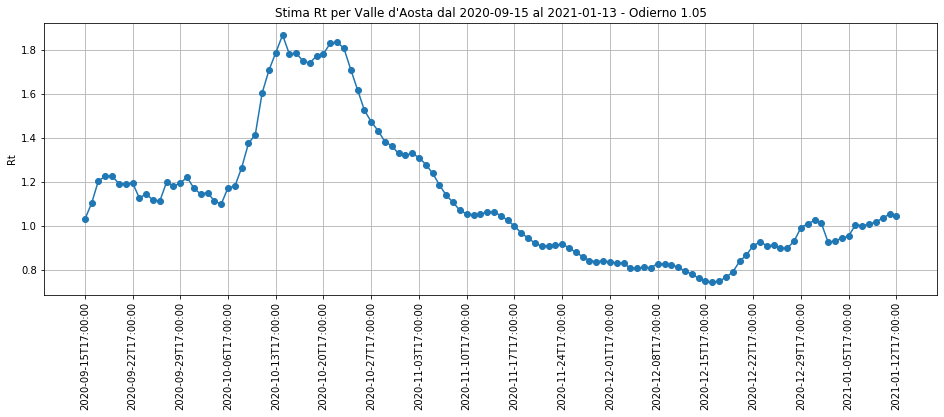

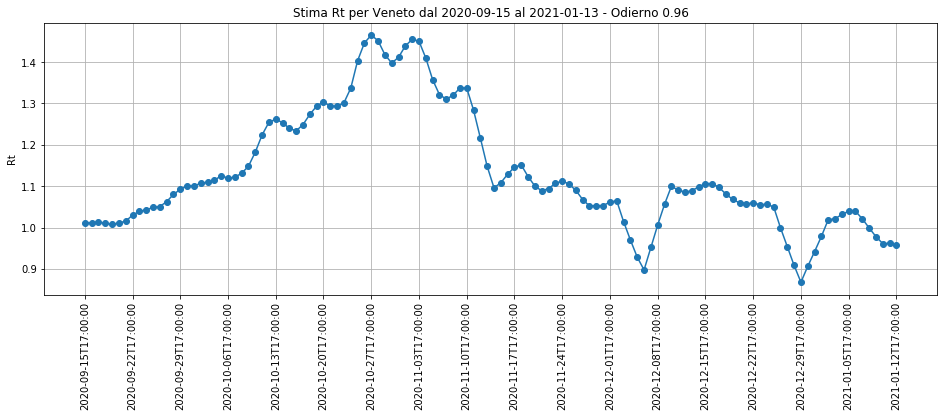

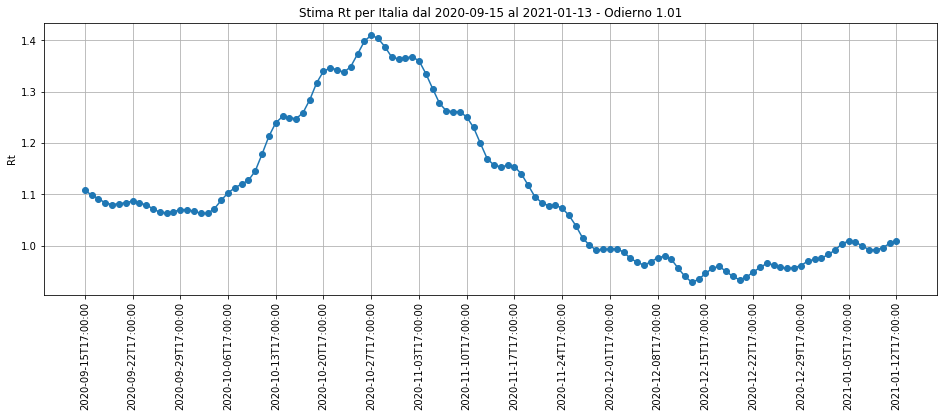

In [45]:
#regioni_plus=['Toscana','Marche','Italia']

for regione in regioni_plus:

    fig,ax=plt.subplots(1,figsize=(16,5))
    ax.plot(rt[regione],marker='o')
    #ax.plot(moving_function_rev1(rt,np.mean,6,6),color='red',linestyle='--',linewidth=3)
    ax.set_title('Stima Rt per %s dal %s al %s - Odierno %.2f'%(regione,giorni[start_day][0:10],giorni[end_day][0:10],rt[regione][-1]))
    ax.set_xticks(list(range(0,numero_giorni,7)))
    ax.set_xticklabels(giorni[list(range(start_day,end_day,7))],rotation=90)
    ax.set_ylabel('Rt')
    ax.grid()

## Bar charts fra regioni

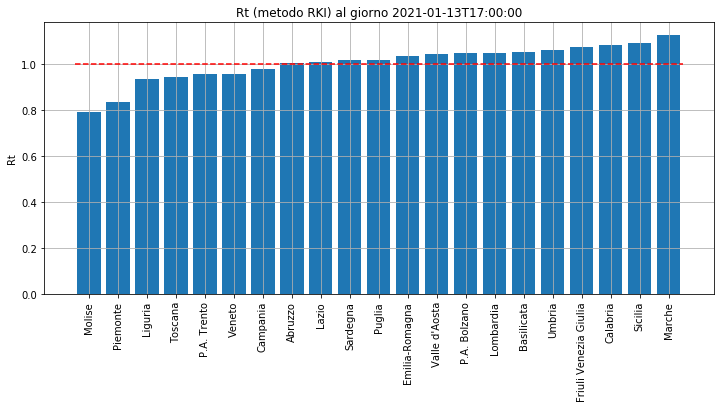

In [46]:
valori=np.array([rt[r][-1] for r in regioni])
ordine=np.argsort(valori)

plt.figure(figsize=(12,5))
plt.title('Rt (metodo RKI) al giorno %s'%giorni[-1])
plt.bar(range(len(regioni)),valori[ordine])
plt.hlines(1,-0.5,20.5,colors='r', linestyles='--')
plt.xticks(range(len(regioni)),regioni[ordine],rotation=90)
plt.ylabel('Rt')
plt.grid()
plt.show()


## Heatmap

In [47]:
import seaborn as sns
import pandas as pd

In [48]:
rt_df=pd.DataFrame(rt)

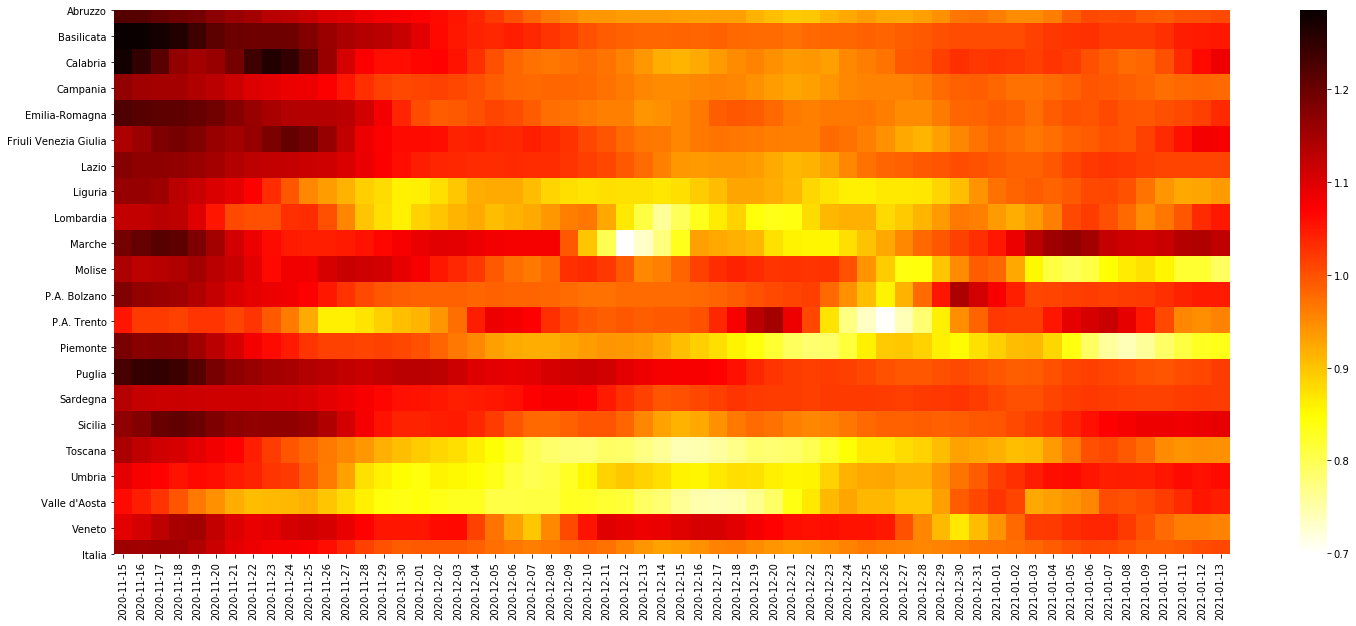

In [49]:
last_days=60

giorni_labels=[g[0:10] for g in giorni[-last_days:]]

fig, ax = plt.subplots(figsize=(25,10)) 
sns.heatmap(rt_df.iloc[-last_days:].transpose(),ax=ax,cmap='hot_r',xticklabels=giorni_labels)

In [50]:
giorni_labeles=[g[0:10] for g in giorni[-30:]]
giorni_labeles

['2020-12-15',
 '2020-12-16',
 '2020-12-17',
 '2020-12-18',
 '2020-12-19',
 '2020-12-20',
 '2020-12-21',
 '2020-12-22',
 '2020-12-23',
 '2020-12-24',
 '2020-12-25',
 '2020-12-26',
 '2020-12-27',
 '2020-12-28',
 '2020-12-29',
 '2020-12-30',
 '2020-12-31',
 '2021-01-01',
 '2021-01-02',
 '2021-01-03',
 '2021-01-04',
 '2021-01-05',
 '2021-01-06',
 '2021-01-07',
 '2021-01-08',
 '2021-01-09',
 '2021-01-10',
 '2021-01-11',
 '2021-01-12',
 '2021-01-13']